## Bitcoin power consumption calculation based on hash rate
The current <a href='https://blockchain.info/charts/hash-rate'>hash rate</a> is about $15 \cdot 10^6$ TH/s (2017-12-07). Assuming best case scenario with everyone using the most efficient miner <a href='https://shop.bitmain.com/specifications.htm?name=antminer_s9_asic_bitcoin_miner'>Antminer S9</a> at 98 J/TH. Multiplying the two, we get
$$15 \cdot 10^6 \text{ TH/s} \cdot 98 \text{ J/TH} = 1.47 \text{ GJ/s} = 1.47 \text{ GW}$$
Giving us the daily energy consumption $35.28$ GWh.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Load raw hashrate data over the last two years
# Downloaded from https://blockchain.info/charts/hash-rate
df = pd.read_csv('data/hash_rate_raw.csv', names=['Date', 'Hashrate'], index_col='Date', parse_dates=True)

In [3]:
df.info()
print('\n','>'*40)
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1637 entries, 2009-01-03 to 2017-12-19
Data columns (total 1 columns):
Hashrate    1637 non-null float64
dtypes: float64(1)
memory usage: 25.6 KB

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


,Hashrate
Date,
2009-01-03,4.971027e-08
2009-01-05,0.000000e+00
2009-01-07,0.000000e+00
2009-01-09,6.959438e-07
2009-01-11,5.269289e-06


<IPython.core.display.Javascript object>


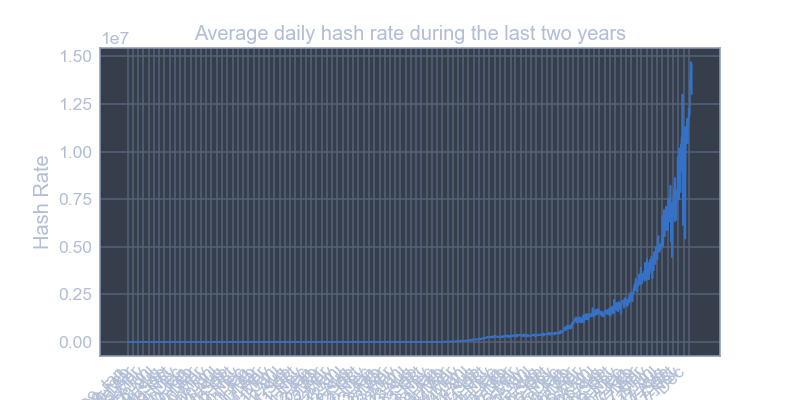

In [4]:
# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(df.index, df.Hashrate)
plt.ylabel('Hash Rate')
plt.xlabel('Date')
plt.title('Average daily hash rate during the last two years')

from matplotlib.dates import DateFormatter
ax = plt.axes()
# Offset: include end month
drange = pd.date_range(min(df.index), max(df.index) + pd.offsets.MonthEnd(), freq='M').strftime('%Y-%m')
# Set xaxis tick on every other month
ax.xaxis.set_ticks(drange)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b'))

ax.xaxis_date()
ax.autoscale_view()
# ax.set_yscale('linear') # Params: {“linear”, “log”, “symlog”, “logit”}

# 
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<IPython.core.display.Javascript object>


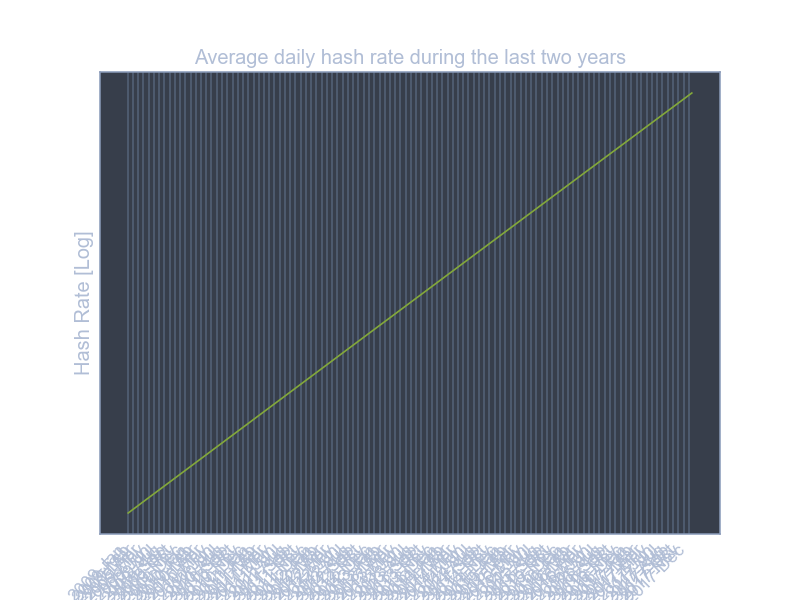

In [5]:
# Logarithmic plot of the data
plt.figure(figsize=(8,6))
plt.plot(df.index, df.index, 'g')
plt.ylabel('Hash Rate [Log]')
plt.xlabel('Date')
plt.title('Average daily hash rate during the last two years')

ax = plt.axes()
# Set xaxis tick on every other month
ax.xaxis.set_ticks(drange)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b'))

ax.set_yscale('log') # Params: {“linear”, “log”, “symlog”, “logit”}
# Proper way to create ticks as: https://stackoverflow.com/a/44079725/4461051
ax.yaxis.set_major_locator(matplotlib.ticker.LogLocator(subs='all'))

ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [6]:
import re
# Import Bitcoin price data from 2015-12-07 to 2017-12-06
price_df = pd.read_csv('price/btc.csv', delimiter='\t')
# Set Date data to datetime
price_df.Date = pd.to_datetime(price_df.Date)

# Set Volumen and Market Cap data to int
price_df['Volume'] = price_df['Volume'].apply(lambda x: re.sub(',', '', str(x)))
price_df['Volume'] = pd.to_numeric(price_df['Volume'], errors='coerce')
price_df['Market Cap'] = price_df['Market Cap'].apply(lambda x: re.sub(',', '', str(x)))
price_df['Market Cap'] = pd.to_numeric(price_df['Market Cap'])

# Reverse order of price_df to correct chronological order
price_df = price_df[::-1]
price_df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
4,2017-12-15,16601.3,18154.1,16601.3,17706.9,1.431000e+10,277936000000
3,2017-12-16,17760.3,19716.7,17515.3,19497.4,1.274060e+10,297376000000
2,2017-12-17,19475.8,20089.0,18974.1,19140.8,1.331460e+10,326141000000
1,2017-12-18,19106.4,19371.0,18355.9,19114.2,1.483950e+10,320000000000
0,2017-12-19,19118.3,19177.8,17275.4,17776.7,1.689450e+10,320242000000


C:\IntelPython3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


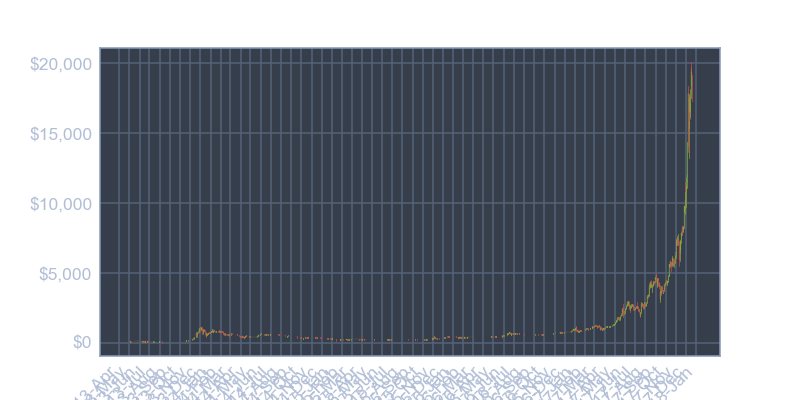

In [7]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.ticker import StrMethodFormatter

price_plt_df = price_df.drop(['Market Cap'], axis=1)
price_plt_df.Date = price_plt_df.Date.apply(matplotlib.dates.date2num)

fig, ax = plt.subplots(figsize=(8,4))
candlestick_ohlc(ax, price_plt_df.values, colorup='g', colordown='r')

# Format Y-axis as dollars
fmt = StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(fmt)

# Format X-axis as date and set ticks at every month
ax.xaxis_date()
drange = pd.date_range(min(price_df.Date), max(price_df.Date) + 2*pd.offsets.MonthEnd(), freq='M').strftime('%Y-%m')
plt.xticks(drange)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
#ax.autoscale_view()

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#ax.xaxis_date()

Log fit and prediction of future consumption
